# Générateur de Noms de Domaine avec LLM
## Expérimentations et Évaluations Systématiques

Ce notebook présente le développement itératif d'un système de génération de noms de domaine utilisant des modèles de langage, avec un focus sur l'évaluation automatisée et la découverte de cas limites.

## 1. Configuration et Imports

In [25]:
import sys
import os
sys.path.append("..")
import numpy as np
import collections
from datetime import datetime
import matplotlib.pyplot as plt

# Import des modules du projet
from src.creation_dataset import CreationDataset
from src.utils import charger_json


print(f"Date de l'expérience: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Date de l'expérience: 2025-08-02 17:22:51


## 2. Création du Dataset Synthétique

Nous commençons par créer un dataset synthétique diversifié pour l'évaluation.

In [2]:
# Initialiser le créateur de dataset
creation_dataset = CreationDataset()

# Créer le dataset complet
print("Création du dataset synthétique...")
chemin_dataset = creation_dataset.sauvegarder_dataset("dataset_experimental.json")

# Charger et analyser le dataset créé
dataset_complet = charger_json(chemin_dataset)

print(f"Dataset créé avec succès:")
print(f"   - Exemples d'entraînement: {len(dataset_complet['entrainement'])}")
print(f"   - Cas limites: {len(dataset_complet['cas_limites'])}")

# Visualisation de la distribution des types de business
descriptions = [ex['description_business'] for ex in dataset_complet['entrainement']]
print(f"\nExemples de descriptions générées:")
for i, desc in enumerate(descriptions[:5]):
    print(f"   {i+1}. {desc}")

INFO:src.utils:Génération d'un dataset de 800 exemples...
INFO:src.utils:Généré 100/800 exemples
INFO:src.utils:Généré 200/800 exemples
INFO:src.utils:Généré 300/800 exemples
INFO:src.utils:Généré 400/800 exemples
INFO:src.utils:Généré 500/800 exemples
INFO:src.utils:Généré 600/800 exemples
INFO:src.utils:Généré 700/800 exemples
INFO:src.utils:Généré 800/800 exemples
INFO:src.utils:Données sauvegardées dans ../data/dataset_experimental.json
INFO:src.utils:Dataset complet sauvegardé: ../data/dataset_experimental.json
INFO:src.utils:Données chargées depuis ../data/dataset_experimental.json


Création du dataset synthétique...
Dataset créé avec succès:
   - Exemples d'entraînement: 800
   - Cas limites: 14

Exemples de descriptions générées:
   1. Nouveau distribution maison à marché local
   2. Service de sport via distribution
   3. service spécialisé en IA situé Londres
   4. moderne traiteur africain dans bord de mer
   5. service web dans incubateur


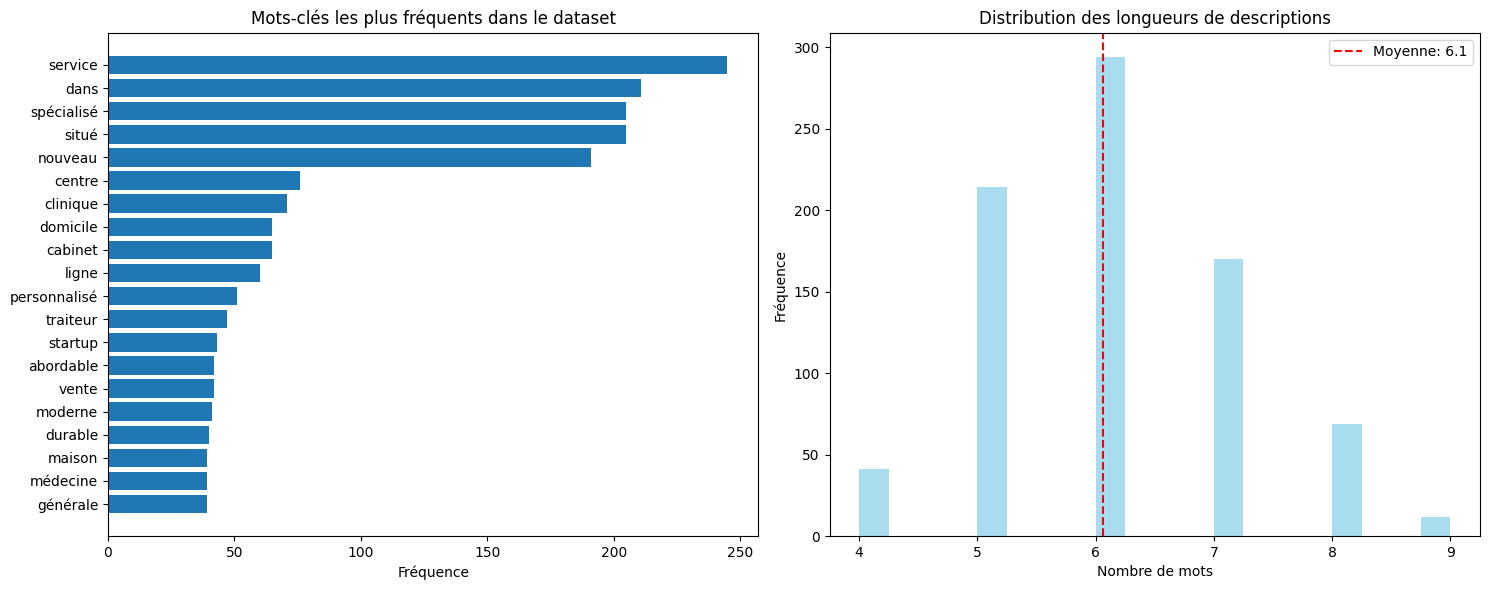

Statistiques du dataset:
   - Longueur moyenne des descriptions: 6.1 mots
   - Longueur médiane: 6.0 mots
   - Vocabulaire unique: 90 mots


In [38]:
# Analyser les mots-clés les plus fréquents
tous_mots = []
for desc in descriptions:
    mots = desc.lower().split()
    tous_mots.extend([mot for mot in mots if len(mot) > 3])

mots_frequents = collections.Counter(tous_mots).most_common(20)

# Créer une visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Graphique des mots les plus fréquents
mots, freq = zip(*mots_frequents)
ax1.barh(range(len(mots)), freq)
ax1.set_yticks(range(len(mots)))
ax1.set_yticklabels(mots)
ax1.set_xlabel('Fréquence')
ax1.set_title('Mots-clés les plus fréquents dans le dataset')
ax1.invert_yaxis()

# Distribution des longueurs de descriptions
longueurs = [len(desc.split()) for desc in descriptions]
ax2.hist(longueurs, bins=20, alpha=0.7, color='skyblue')
ax2.set_xlabel('Nombre de mots')
ax2.set_ylabel('Fréquence')
ax2.set_title('Distribution des longueurs de descriptions')
ax2.axvline(np.mean(longueurs), color='red', linestyle='--', label=f'Moyenne: {np.mean(longueurs):.1f}')
ax2.legend()

plt.tight_layout()
plt.show()

print(f"Statistiques du dataset:")
print(f"   - Longueur moyenne des descriptions: {np.mean(longueurs):.1f} mots")
print(f"   - Longueur médiane: {np.median(longueurs):.1f} mots")
print(f"   - Vocabulaire unique: {len(set(tous_mots))} mots")

In [ ]:
set(longueurs)

{4, 5, 6, 7, 8, 9}